In [58]:
# import library-libary yang digunakan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [34]:
# load dataset daftar_pekerja.csv
nilai = pd.read_csv('daftar_pekerja.csv')

In [35]:
# menampilkan lima data teratas
nilai.head()

,NP_Id,lama_bekerja,nilai_kpi
0,NP-101,15,95
1,NP-102,15,100
2,NP-103,14,98
3,NP-104,14,100
4,NP-105,14,92


In [36]:
# cek dimensi data
nilai.shape

(80, 3)

In [37]:
# menampilkan nama-nama atribut
nilai.columns

Index(['NP_Id', 'lama_bekerja', 'nilai_kpi'], dtype='object')

In [57]:
# menampilkan tipe data masing-masing atribut
nilai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   NP_Id         80 non-null     object
 1   lama_bekerja  80 non-null     int64 
 2   nilai_kpi     80 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.0+ KB


In [39]:
# cek apakah terdapat missing value
nilai.isnull().sum()

NP_Id           0
lama_bekerja    0
nilai_kpi       0
dtype: int64

Data penilaian_pekerja.csv tidak terdapat missing value

**Atribute/Feature Selection**

Pada bagian data understanding, telah dijelaskan bahwa nopek sebagai identity, sehingga tidak digunakan dalam pemodelan.

In [40]:
#filter hanya atribut lama_bekerja dan nilai_kpi yang digunakan dalam pemodelan
nilai_fs = nilai[['lama_bekerja', 'nilai_kpi']]

In [41]:
# cek lima data teratas setelah dilakukan feature selection
nilai_fs.head()

,lama_bekerja,nilai_kpi
0,15,95
1,15,100
2,14,98
3,14,100
4,14,92


In [42]:
# cek dimensi data setelah dilakukan feature selection
nilai_fs.shape

(80, 2)

In [43]:
# menampilkan kolom yang digunakan setelah feature selection
nilai_fs.columns

Index(['lama_bekerja', 'nilai_kpi'], dtype='object')

**Exploratory Data Analysis**

In [44]:
# statistic descriptive
nilai_fs.describe()

,lama_bekerja,nilai_kpi
count,80.000000,80.00000
mean,7.875000,69.70000
std,4.593267,27.03556
min,1.000000,10.00000
25%,4.000000,50.00000
50%,7.000000,76.50000
75%,12.250000,94.25000
max,15.000000,100.00000


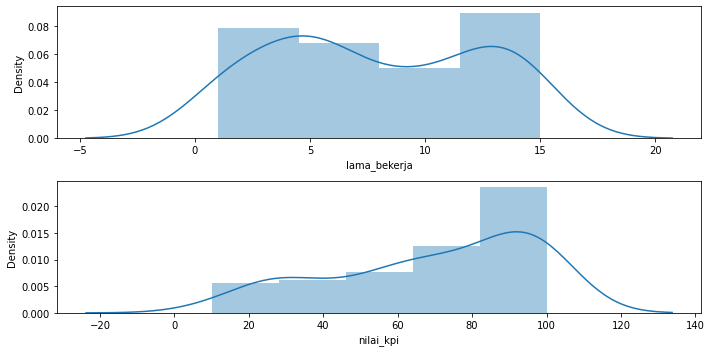

In [45]:
# menampilkan distribusi kedua atribut
fig = plt.figure(figsize=(10,5))

fig.add_subplot(2,1,1)
sns.distplot(nilai['lama_bekerja'])

fig.add_subplot(2,1,2)
sns.distplot(nilai['nilai_kpi'])

fig.tight_layout()

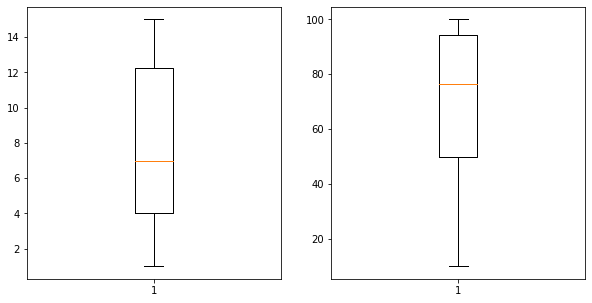

In [46]:
# melihat distribusi kedua atribut dalam bentuk box plot
fig = plt.figure(figsize=(10,5))

fig.add_subplot(1,2,1)
plt.boxplot(nilai['lama_bekerja'])

fig.add_subplot(1,2,2)
plt.boxplot(nilai['nilai_kpi'])

plt.show()

In [47]:
# hubungan korelasi antara lama_bekerja dan realisasi_kpi
nilai_fs.corr()

,lama_bekerja,nilai_kpi
lama_bekerja,1.000000,0.869491
nilai_kpi,0.869491,1.000000


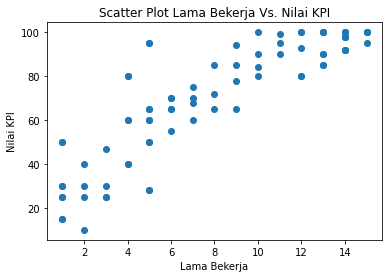

In [48]:
# Bivariate analysis antara atribut lama_bekerja dan nilai_kpi dengan scatter plot
plt.scatter(nilai_fs['lama_bekerja'], nilai_fs['nilai_kpi'])
plt.xlabel('Lama Bekerja')
plt.ylabel('Nilai KPI')
plt.title('Scatter Plot Lama Bekerja Vs. Nilai KPI')
plt.show()

Scatter plot menunjukkan korelasi positif

Semakin lama bekerja, nilai realisasi KPI semakin tinggi

**Modeling**

Dalam tahapan modeling, algoritme machine learning yang digunakan adalah algoritme K-Means

Nilai K yang digunakan adalah tiga, karena performa pekerja akan dibagi menjadi tiga kelompok

In [49]:
kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(nilai_fs)
kmeans.cluster_centers_

array([[11.575     , 92.45      ],
       [ 2.41176471, 27.11764706],
       [ 5.47826087, 61.60869565]])

**EVALUAASI**

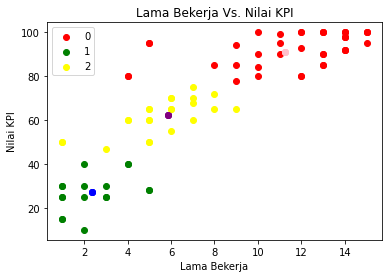

In [50]:
x = nilai['lama_bekerja']
y = nilai['nilai_kpi']

group = kmeans.labels_

colors = ['red', 'green', 'yellow']
fig, ax = plt.subplots()

for g in set(kmeans.labels_):
    xi = [x[j] for j in range(len(x)) if group[j]==g]
    yi = [y[j] for j in range(len(y)) if group[j]==g]
    ax.scatter(xi, yi, c=colors[g], label=g)
    ax.scatter(2.36363636,  27.09090909, c='blue')
    ax.scatter(5.875,  62.3125, c='purple')
    ax.scatter(11.26086957,  91.000, c='pink')
    plt.xlabel('Lama Bekerja')
    plt.ylabel('Nilai KPI')
    plt.title('Lama Bekerja Vs. Nilai KPI')

ax.legend()
plt.show()

Pekerja dengan kelompok performa buruk masuk ke dalam Cluster 0 (warna merah)

Pekerja dengan kelompok performa sedang masuk ke dalam Cluster 2 (warna kuning)

Pekerja dengan kelompok performa baik masuk ke dalam Cluster 1 (warna hijau)

***Dalam tahapan evaluasi, akan dihitung berapa jumlah kelompok (nilai K) optimal dari algoritme K-Means saat diterapkan pada dataset daaftar_pekerja.csv***

In [51]:
# manceri nilai K optimal
inertia = []
silhouette = []

K = range(3,10)
for k in K:
    kmeans = KMeans(n_clusters = k)
    kmeans = kmeans.fit(nilai_fs)
    kmeans.labels_
    
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(nilai_fs, kmeans.labels_))

Text(0, 0.5, 'Nilai Silhoutte')

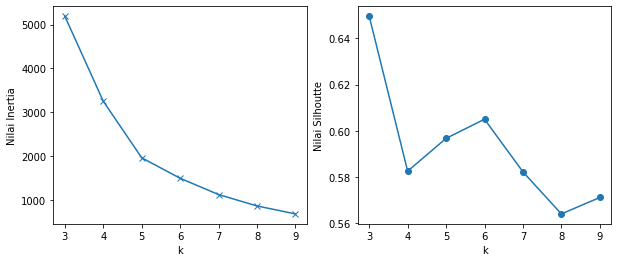

In [56]:
# visualisasi plotting nilai K
fig = plt.figure(figsize=(10,4))

fig.add_subplot(1,2,1)
plt.plot(K, inertia, marker='x')
plt.xlabel('k')
plt.ylabel('Nilai Inertia')

fig.add_subplot(1,2,2)           
plt.plot(K, silhouette, marker='o')
plt.xlabel('k')
plt.ylabel('Nilai Silhoutte')

Dari grafik di atas terlihat bahwa nilai K optimal adalah tiga, sehingga divisi HC Pertamina Refinery Unit III Plaju, Sumatera Selatan sudah tepat membagi kelompok menjadi tiga kelompok

**Deployment**

Menampilkan data semua pekerja dengan menambahkan atribut nopek dan Cluster

In [53]:
nilai_fs['NP_Id'] = nilai['NP_Id']
nilai_fs['lama_bekerja'] = nilai_fs['lama_bekerja']
nilai_fs['nilai_kpi'] = nilai_fs['nilai_kpi']
nilai_fs['Cluster']=kmeans.labels_
nilai_fs

,lama_bekerja,nilai_kpi,NP_Id,Cluster
0,15,95,NP-101,3
1,15,100,NP-102,3
2,14,98,NP-103,3
3,14,100,NP-104,3
4,14,92,NP-105,8
...,...,...,...,...
75,15,100,NP-176,3
76,14,98,NP-177,3
77,14,100,NP-178,3
78,14,92,NP-179,8


Menampilkan pekerja yang mengikuti kursus peningkatan kompetensi (berada di Cluster 0)

In [54]:
pekerja_performa_buruk = nilai_fs[nilai_fs.Cluster==0]
pekerja_performa_buruk

,lama_bekerja,nilai_kpi,NP_Id,Cluster
34,5,28,NP-135,0
39,3,25,NP-140,0
40,3,30,NP-141,0
43,2,30,NP-144,0
45,2,25,NP-146,0
46,1,30,NP-147,0
48,1,25,NP-149,0
64,5,28,NP-165,0
69,3,25,NP-170,0
70,1,30,NP-171,0


In [55]:
# jumlah data pekerja dengan performa buruk dihitunng berdasarkan count nopek
pekerja_performa_buruk['NP_Id'].count()

11